In [ ]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#downloading dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

100% 324M/325M [00:14<00:00, 25.7MB/s]
100% 325M/325M [00:14<00:00, 23.1MB/s]


In [ ]:
#extracting dataset from zip file by unzipping
import zipfile
a = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip','r')
a.extractall('/content')
a.close()

In [ ]:
#importing libraries
#numpy for arrays
import numpy as np
#pandas for data analaysis
import pandas as pd
#os for directories
import os
#matplot for displaying images and plotting images
import matplotlib.pyplot as plt
import seaborn as sns
#glob is used for files and determing path
from glob import glob
#random seed to generate random values. Sending images to training
np.random.seed(21)


In [ ]:
from PIL import Image
#load the training and testing files
directory_benign_train = '/content/train/benign'
directory_malignant_train = '/content/train/malignant'
directory_benign_test = '/content/test/benign'
directory_malignant_test = '/content/test/malignant'
read = lambda imname: np.asarray(Image.open(imname).convert('RGB').resize((32,32)))

#reading files
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]


img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

type(img_benign_train)

list

In [ ]:
#converting images to arrays of unsigned 8 bit integer
X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

In [ ]:
#labeling dieases as 1 or 0
y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
#combiining all images
X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0)
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 32, 32, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 32, 32, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#randomly shuffling all the images
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]
print(X_train)

[[[[182 158 184]
   [181 155 178]
   [182 155 177]
   ...
   [180 153 162]
   [184 159 182]
   [185 163 188]]

  [[183 157 182]
   [182 153 175]
   [181 152 174]
   ...
   [184 159 177]
   [184 162 185]
   [186 166 191]]

  [[182 157 179]
   [181 154 176]
   [182 157 181]
   ...
   [185 163 185]
   [184 163 185]
   [185 163 184]]

  ...

  [[178 152 174]
   [178 153 174]
   [178 152 173]
   ...
   [181 154 176]
   [180 152 174]
   [178 151 173]]

  [[177 151 173]
   [178 151 174]
   [178 151 174]
   ...
   [181 152 175]
   [180 150 173]
   [179 151 173]]

  [[176 151 173]
   [177 153 174]
   [178 155 176]
   ...
   [180 155 176]
   [179 151 174]
   [179 152 174]]]


 [[[234 155 162]
   [234 154 162]
   [237 158 166]
   ...
   [251 177 187]
   [253 180 191]
   [249 178 189]]

  [[233 155 162]
   [232 153 160]
   [235 156 163]
   ...
   [251 177 190]
   [250 178 187]
   [248 178 188]]

  [[231 152 158]
   [233 154 161]
   [236 158 164]
   ...
   [251 177 190]
   [250 177 188]
   [249 177

In [ ]:
print("Shuffle orders example: ", s1)


Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


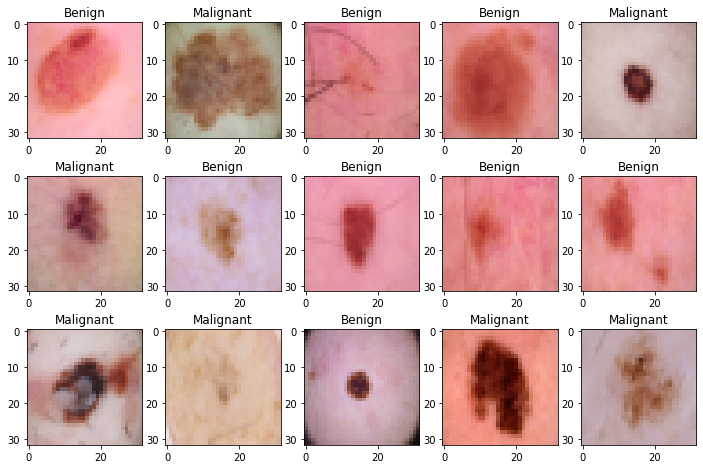

In [ ]:
#displaying images using matplot
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
#changing the images arrays into 2D arrays for better classification
import keras
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
#resizing
X_train = X_train/255
X_test = X_test/255

In [ ]:
#applying CNN model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_cnn_model(input_shape = (32, 32, 3), num_classes=2):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(num_classes, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(X_test,y_test))



print(history.history.keys())

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.6026

42/42 [==============================] - 9s 15ms/step - loss: 0.6535 - accuracy: 0.6026 - val_loss: 0.6711 - val_accuracy: 0.5879 - lr: 0.0010
Epoch 2/50
36/42 [========================>.....] - ETA: 0s - loss: 0.5737 - accuracy: 0.7122

42/42 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.7137 - val_loss: 0.4800 - val_accuracy: 0.7591 - lr: 0.0010
Epoch 3/50
39/42 [==========================>...] - ETA: 0s - loss: 0.4692 - accuracy: 0.7736

42/42 [==============================] - 0s 7ms/step - loss: 0.4657 - accuracy: 0.7747 - val_loss: 0.4213 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 4/50
38/42 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.7812

42/42 [==============================] - 0s 8ms/step - loss: 0.4307 - accuracy: 0.7838 - val_loss: 0.3996 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 5/50
40/42 [===========================>..] - ETA: 0s - loss: 0.3961 - accuracy: 0.8020

42/42 [==============================] - 0s 7ms/step - loss: 0.3982 - accuracy: 0.8005 - val_loss: 0.3876 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 6/50
41/42 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.7908

42/42 [==============================] - 0s 7ms/step - loss: 0.4008 - accuracy: 0.7911 - val_loss: 0.3947 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 7/50
39/42 [==========================>...] - ETA: 0s - loss: 0.3757 - accuracy: 0.8149

42/42 [==============================] - 0s 7ms/step - loss: 0.3764 - accuracy: 0.8127 - val_loss: 0.3639 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 8/50
37/42 [=========================>....] - ETA: 0s - loss: 0.3752 - accuracy: 0.8053

42/42 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8077 - val_loss: 0.3690 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 9/50
38/42 [==========================>...] - ETA: 0s - loss: 0.3658 - accuracy: 0.8084

42/42 [==============================] - 0s 7ms/step - loss: 0.3697 - accuracy: 0.8058 - val_loss: 0.3880 - val_accuracy: 0.8076 - lr: 0.0010
Epoch 10/50
41/42 [============================>.] - ETA: 0s - loss: 0.3682 - accuracy: 0.8201

42/42 [==============================] - 0s 7ms/step - loss: 0.3689 - accuracy: 0.8195 - val_loss: 0.3925 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 11/50
39/42 [==========================>...] - ETA: 0s - loss: 0.3546 - accuracy: 0.8185

42/42 [==============================] - 0s 8ms/step - loss: 0.3523 - accuracy: 0.8199 - val_loss: 0.4149 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 12/50
41/42 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8369

42/42 [==============================] - 0s 7ms/step - loss: 0.3428 - accuracy: 0.8369 - val_loss: 0.3922 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 13/50
39/42 [==========================>...] - ETA: 0s - loss: 0.3579 - accuracy: 0.8241

42/42 [==============================] - 0s 7ms/step - loss: 0.3514 - accuracy: 0.8286 - val_loss: 0.3299 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 14/50
39/42 [==========================>...] - ETA: 0s - loss: 0.3325 - accuracy: 0.8381

42/42 [==============================] - 0s 7ms/step - loss: 0.3311 - accuracy: 0.8377 - val_loss: 0.3260 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 15/50
39/42 [==========================>...] - ETA: 0s - loss: 0.3203 - accuracy: 0.8417

42/42 [==============================] - 0s 7ms/step - loss: 0.3195 - accuracy: 0.8419 - val_loss: 0.3383 - val_accuracy: 0.8379 - lr: 0.0010
Epoch 16/50
38/42 [==========================>...] - ETA: 0s - loss: 0.3299 - accuracy: 0.8409

42/42 [==============================] - 0s 8ms/step - loss: 0.3291 - accuracy: 0.8388 - val_loss: 0.3200 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 17/50
40/42 [===========================>..] - ETA: 0s - loss: 0.3256 - accuracy: 0.8387

42/42 [==============================] - 0s 7ms/step - loss: 0.3252 - accuracy: 0.8396 - val_loss: 0.3792 - val_accuracy: 0.8121 - lr: 0.0010
Epoch 18/50
37/42 [=========================>....] - ETA: 0s - loss: 0.3240 - accuracy: 0.8412

42/42 [==============================] - 0s 7ms/step - loss: 0.3177 - accuracy: 0.8434 - val_loss: 0.3159 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 19/50
40/42 [===========================>..] - ETA: 0s - loss: 0.3045 - accuracy: 0.8520

42/42 [==============================] - 0s 7ms/step - loss: 0.3032 - accuracy: 0.8529 - val_loss: 0.3088 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 20/50
41/42 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8552

42/42 [==============================] - 0s 7ms/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.3122 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 21/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2934 - accuracy: 0.8539

42/42 [==============================] - 0s 7ms/step - loss: 0.2931 - accuracy: 0.8540 - val_loss: 0.3176 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 22/50
41/42 [============================>.] - ETA: 0s - loss: 0.3008 - accuracy: 0.8563

42/42 [==============================] - 0s 7ms/step - loss: 0.3001 - accuracy: 0.8567 - val_loss: 0.3014 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 23/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2702 - accuracy: 0.8742

42/42 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.8733 - val_loss: 0.3823 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 24/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2983 - accuracy: 0.8680

42/42 [==============================] - 0s 7ms/step - loss: 0.2943 - accuracy: 0.8699 - val_loss: 0.2976 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 25/50
37/42 [=========================>....] - ETA: 0s - loss: 0.2571 - accuracy: 0.8767

42/42 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.8768 - val_loss: 0.3097 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 26/50
41/42 [============================>.] - ETA: 0s - loss: 0.2756 - accuracy: 0.8716

42/42 [==============================] - 0s 7ms/step - loss: 0.2754 - accuracy: 0.8718 - val_loss: 0.3180 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 27/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2609 - accuracy: 0.8762

42/42 [==============================] - 0s 7ms/step - loss: 0.2592 - accuracy: 0.8771 - val_loss: 0.3067 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 28/50
38/42 [==========================>...] - ETA: 0s - loss: 0.2630 - accuracy: 0.8820

42/42 [==============================] - 0s 7ms/step - loss: 0.2605 - accuracy: 0.8832 - val_loss: 0.3264 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 29/50
41/42 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.8845

42/42 [==============================] - 0s 6ms/step - loss: 0.2552 - accuracy: 0.8851 - val_loss: 0.3087 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 30/50
39/42 [==========================>...] - ETA: 0s - loss: 0.2425 - accuracy: 0.8810

42/42 [==============================] - 0s 7ms/step - loss: 0.2440 - accuracy: 0.8813 - val_loss: 0.3104 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 31/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2431 - accuracy: 0.8891

42/42 [==============================] - 0s 7ms/step - loss: 0.2428 - accuracy: 0.8889 - val_loss: 0.3169 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 32/50
38/42 [==========================>...] - ETA: 0s - loss: 0.2383 - accuracy: 0.8865

42/42 [==============================] - 0s 7ms/step - loss: 0.2386 - accuracy: 0.8866 - val_loss: 0.3139 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 33/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2121 - accuracy: 0.9035

42/42 [==============================] - 0s 7ms/step - loss: 0.2159 - accuracy: 0.9003 - val_loss: 0.3185 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 34/50
39/42 [==========================>...] - ETA: 0s - loss: 0.2161 - accuracy: 0.8986

42/42 [==============================] - 0s 8ms/step - loss: 0.2156 - accuracy: 0.8991 - val_loss: 0.2994 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 35/50
40/42 [===========================>..] - ETA: 0s - loss: 0.2044 - accuracy: 0.9082

42/42 [==============================] - 0s 7ms/step - loss: 0.2046 - accuracy: 0.9071 - val_loss: 0.3188 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 36/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1955 - accuracy: 0.9043

42/42 [==============================] - 0s 7ms/step - loss: 0.1942 - accuracy: 0.9052 - val_loss: 0.3613 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 37/50
41/42 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9043

42/42 [==============================] - 0s 6ms/step - loss: 0.2097 - accuracy: 0.9041 - val_loss: 0.3275 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 38/50
41/42 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9078

42/42 [==============================] - 0s 7ms/step - loss: 0.1995 - accuracy: 0.9082 - val_loss: 0.3282 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 39/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1802 - accuracy: 0.9187

42/42 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9166 - val_loss: 0.3527 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 40/50
41/42 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0.9032

42/42 [==============================] - 0s 7ms/step - loss: 0.2098 - accuracy: 0.9033 - val_loss: 0.3353 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 41/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1797 - accuracy: 0.9184

42/42 [==============================] - 0s 8ms/step - loss: 0.1829 - accuracy: 0.9170 - val_loss: 0.3350 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 42/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1853 - accuracy: 0.9133

42/42 [==============================] - 0s 7ms/step - loss: 0.1883 - accuracy: 0.9124 - val_loss: 0.3381 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 43/50
41/42 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9074

42/42 [==============================] - 0s 7ms/step - loss: 0.1898 - accuracy: 0.9078 - val_loss: 0.3429 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 44/50
41/42 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9181

42/42 [==============================] - 0s 7ms/step - loss: 0.1885 - accuracy: 0.9181 - val_loss: 0.3809 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 45/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1846 - accuracy: 0.9137

42/42 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 0.9124 - val_loss: 0.3470 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 46/50
40/42 [===========================>..] - ETA: 0s - loss: 0.1504 - accuracy: 0.9387

42/42 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.9359 - val_loss: 0.3502 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 47/50
39/42 [==========================>...] - ETA: 0s - loss: 0.1595 - accuracy: 0.9267

42/42 [==============================] - 0s 7ms/step - loss: 0.1553 - accuracy: 0.9298 - val_loss: 0.3518 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 48/50
38/42 [==========================>...] - ETA: 0s - loss: 0.1517 - accuracy: 0.9280

42/42 [==============================] - 0s 8ms/step - loss: 0.1529 - accuracy: 0.9264 - val_loss: 0.3639 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 49/50
36/42 [========================>.....] - ETA: 0s - loss: 0.1477 - accuracy: 0.9297

42/42 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9295 - val_loss: 0.4313 - val_accuracy: 0.8303 - lr: 0.0010
Epoch 50/50
39/42 [==========================>...] - ETA: 0s - loss: 0.1667 - accuracy: 0.9263

42/42 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9276 - val_loss: 0.3831 - val_accuracy: 0.8591 - lr: 0.0010
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


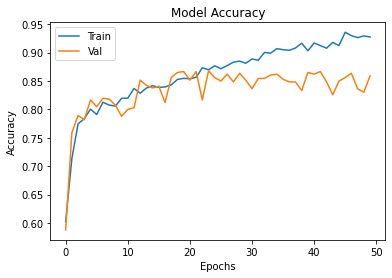

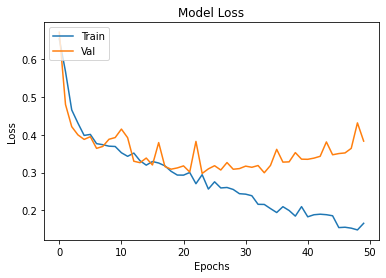

In [ ]:
#plotting acuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

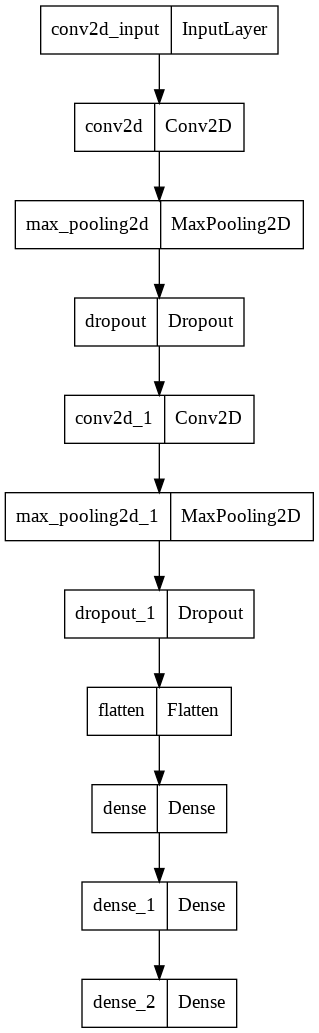

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

In [ ]:
!pip install keras_efficientnets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.3 MB/s 


In [ ]:
import keras_applications
from keras_efficientnets import EfficientNetB5
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(32,32,3),classes=y_train.shape[1])

115295288/115295288 [==============================] - 28s 0us/step


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def build_cnn_model(input_shape = (32, 32, 3), num_classes=2):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(2, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:
model_cnn = build_cnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 2048)        28513520  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 28,792,562
Trainable params: 28,619,826
Non-trainable params: 172,736
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn .fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(X_test,y_test))



print(history.history.keys())

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.7812

42/42 [==============================] - 38s 222ms/step - loss: 0.4469 - accuracy: 0.7812 - val_loss: 6.8728 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8665

42/42 [==============================] - 4s 91ms/step - loss: 0.3152 - accuracy: 0.8665 - val_loss: 1.0110 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.8805

42/42 [==============================] - 4s 91ms/step - loss: 0.2903 - accuracy: 0.8805 - val_loss: 3.8999 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9188

42/42 [==============================] - 4s 92ms/step - loss: 0.1994 - accuracy: 0.9188 - val_loss: 1.2811 - val_accuracy: 0.6485 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9344

42/42 [==============================] - 4s 103ms/step - loss: 0.1532 - accuracy: 0.9344 - val_loss: 1.1890 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - ETA: 0s - loss: 0.1750 - accuracy: 0.9287

42/42 [==============================] - 4s 91ms/step - loss: 0.1750 - accuracy: 0.9287 - val_loss: 0.9783 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9401

42/42 [==============================] - 4s 93ms/step - loss: 0.1522 - accuracy: 0.9401 - val_loss: 0.7786 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 8/50
42/42 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9541

42/42 [==============================] - 4s 106ms/step - loss: 0.1232 - accuracy: 0.9541 - val_loss: 0.6177 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 9/50
42/42 [==============================] - ETA: 0s - loss: 0.1049 - accuracy: 0.9628

42/42 [==============================] - 4s 93ms/step - loss: 0.1049 - accuracy: 0.9628 - val_loss: 0.5810 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 10/50
42/42 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9757

42/42 [==============================] - 4s 92ms/step - loss: 0.0692 - accuracy: 0.9757 - val_loss: 0.5703 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 11/50
42/42 [==============================] - ETA: 0s - loss: 0.1286 - accuracy: 0.9537

42/42 [==============================] - 4s 92ms/step - loss: 0.1286 - accuracy: 0.9537 - val_loss: 0.4433 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 12/50
42/42 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9738

42/42 [==============================] - 4s 91ms/step - loss: 0.0760 - accuracy: 0.9738 - val_loss: 0.4763 - val_accuracy: 0.8455 - lr: 0.0010
Epoch 13/50
42/42 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9765

42/42 [==============================] - 4s 91ms/step - loss: 0.0620 - accuracy: 0.9765 - val_loss: 0.7439 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 14/50
42/42 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9761

42/42 [==============================] - 4s 101ms/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.6116 - val_accuracy: 0.8576 - lr: 0.0010
Epoch 15/50
42/42 [==============================] - ETA: 0s - loss: 0.0795 - accuracy: 0.9723

42/42 [==============================] - 5s 107ms/step - loss: 0.0795 - accuracy: 0.9723 - val_loss: 0.8183 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 16/50
42/42 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9518

42/42 [==============================] - 4s 92ms/step - loss: 0.1449 - accuracy: 0.9518 - val_loss: 0.5662 - val_accuracy: 0.8515 - lr: 0.0010
Epoch 17/50
42/42 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9791

42/42 [==============================] - 4s 94ms/step - loss: 0.0630 - accuracy: 0.9791 - val_loss: 0.9423 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 18/50
42/42 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9492

42/42 [==============================] - 4s 94ms/step - loss: 0.1451 - accuracy: 0.9492 - val_loss: 0.4913 - val_accuracy: 0.8318 - lr: 0.0010
Epoch 19/50
42/42 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9750

42/42 [==============================] - 4s 93ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.4637 - val_accuracy: 0.8742 - lr: 0.0010
Epoch 20/50
42/42 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9901

42/42 [==============================] - 4s 92ms/step - loss: 0.0365 - accuracy: 0.9901 - val_loss: 0.5437 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 21/50
42/42 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9947

42/42 [==============================] - 4s 91ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.6391 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 22/50
42/42 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9917

42/42 [==============================] - 4s 93ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.8799 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 23/50
42/42 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9894

42/42 [==============================] - 4s 92ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.6187 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 24/50
42/42 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9901

42/42 [==============================] - 4s 92ms/step - loss: 0.0342 - accuracy: 0.9901 - val_loss: 0.5187 - val_accuracy: 0.8576 - lr: 0.0010
Epoch 25/50
42/42 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9970

42/42 [==============================] - 4s 92ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.6019 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 26/50
42/42 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9951

42/42 [==============================] - 4s 91ms/step - loss: 0.0123 - accuracy: 0.9951 - val_loss: 0.6596 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 27/50
36/42 [========================>.....] - ETA: 0s - loss: 0.0307 - accuracy: 0.9896

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_cnn)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN ':98 , 'EfficientNET':99}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods  in train data")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = { 'CNN ':75,  'EfficientNET ':79}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)

plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods  in test data")
plt.show()

In [ ]:
import cv2

In [ ]:
a=cv2.imread('/content/m.jpeg')

In [ ]:
#shape of input image
a.shape

In [ ]:
#reading image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/m.jpeg', target_size=(32, 32))

In [ ]:
#converting predicting image to numpy array
img_array = image.img_to_array(img)
#print(img_array)
#filling the dimensions which are empty
img_batch = np.expand_dims(img_array, axis=0)
print(img_batch)

In [ ]:
#highlighing the image details by converting RGB TO BGR
img_preprocessed = preprocess_input(img_batch)
print(img_preprocessed)

In [ ]:
a=history.model.predict(img_preprocessed)

In [ ]:
print(a)

In [ ]:
def classify(a):
  if (a[0][0]==1 and a[0][1]==0):
    print("benign")
  else:
    print("malignant")

In [ ]:
print(classify(a))